In [11]:
# For Data Processing
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import load_img



# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Miscellaneous
from tqdm import tqdm
import os
import random
import cv2
import imutils

ModuleNotFoundError: No module named 'tensorflow.keras'

In [ ]:
training = r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\dataset\Training/'
testing =  r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\dataset\Testing/'



In [10]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


AttributeError: module 'tensorflow' has no attribute '__version__'

In [ ]:
def crop_img(img):
    # Find the extreme points and take a reactangle out of them
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # find contours in thresholded image, then grab the largest one
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)
    # we usually want the focused part to be white for it to be detected correctly
    # Image contouring is process of identifying structural outlines of objects for better detection
    cntrs = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # image, contour retrieval method and contour approximation
    cntrs = imutils.grab_contours(cntrs) # actually obtain the contours
    c = max(cntrs, key=cv2.contourArea) # obtain the largest contour
   
    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # adding the contour on image
    img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

    # adding the extreme points
    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

    # crop
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    return new_img

In [234]:
training_dir=os.listdir(training)
testing_dir=os.listdir(testing)
img_size=512

for dir in training_dir:
    save_path=r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\dataset2\Training/'+dir
    path=os.path.join(training, dir)
    image_dir=os.listdir(path)
    for img in image_dir:
        image=cv2.imread(os.path.join(path, img))
        new_img=crop_img(image)
        new_img=cv2.resize(new_img, (img_size, img_size))
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        cv2.imwrite(save_path+'/'+img, new_img)
        
for dir in testing_dir:
    save_path=r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\dataset2\Testing/'+dir
    path=os.path.join(testing, dir)
    image_dir=os.listdir(path)
    for img in image_dir:
        image=cv2.imread(os.path.join(path, img))
        new_img=crop_img(image)
        new_img=cv2.resize(new_img, (img_size, img_size))
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        cv2.imwrite(save_path+'/'+img, new_img)

In [235]:
train_paths = []
train_labels = []

trainpath = r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\dataset2\Training/'
for label in os.listdir(trainpath):
    for image in os.listdir(trainpath+label):
        train_paths.append(trainpath+label+'/'+image)
        train_labels.append(label)
print("Number of Total Images For Training :",len(train_paths))


# Shuffle the data if needed
train_paths, train_labels = shuffle(train_paths, train_labels)

Number of Total Images For Training : 5712


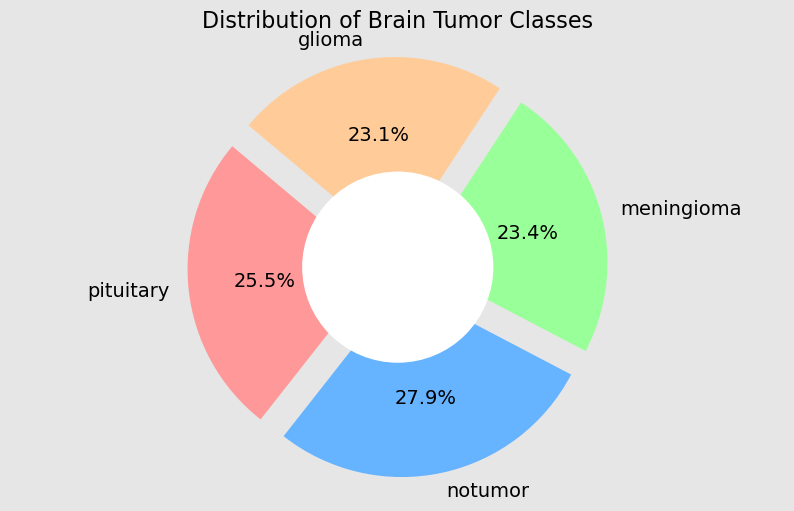

In [105]:
import matplotlib.pyplot as plt

# Data
labels = ['pituitary', 'notumor', 'meningioma', 'glioma']
sizes = [
    len([x for x in train_labels if x == 'pituitary']),
    len([x for x in train_labels if x == 'notumor']),
    len([x for x in train_labels if x == 'meningioma']),
    len([x for x in train_labels if x == 'glioma'])
]

# Stylish colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Explode (Separate the slices)
explode = (0.1, 0.1, 0.1, 0.1)

# Create a figure with a custom background color
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#e6e6e6')

# Pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=explode,
    textprops={'fontsize': 14, 'color': 'black'}
)

# Add a circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title
plt.title('Distribution of Brain Tumor Classes', fontsize=16)

# Show the chart
plt.show()


In [236]:
test_paths = []
test_labels = []


testpath = r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\models\dataset2\Testing/'


for label in os.listdir(testpath):
    for image in os.listdir(testpath+label):
        test_paths.append(testpath+label+'/'+image)
        test_labels.append(label)
print("Number of Total Images For Training :",len(test_paths))
test_paths, test_labels = shuffle(test_paths, test_labels)

Number of Total Images For Training : 1311


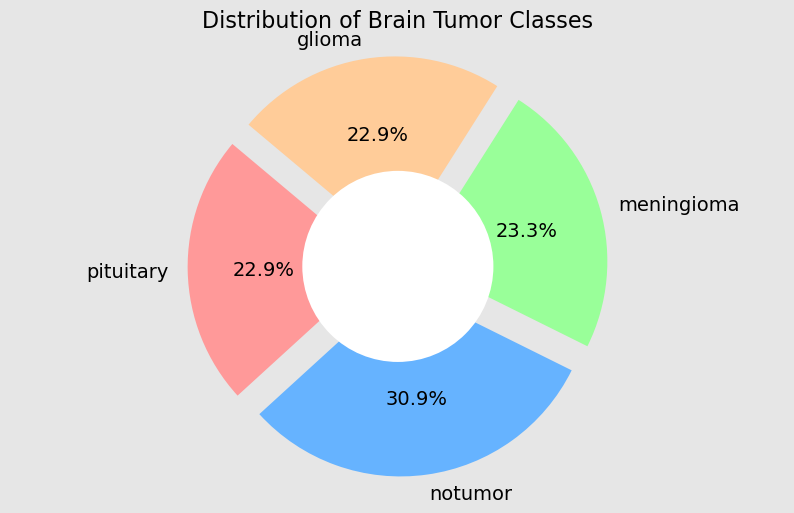

In [106]:
import matplotlib.pyplot as plt

# Data
labels = ['pituitary', 'notumor', 'meningioma', 'glioma']
sizes = [
            len([x for x in test_labels if x=='pituitary']),
         len([x for x in test_labels if x=='notumor']),
         len([x for x in test_labels if x=='meningioma']),
         len([x for x in test_labels if x=='glioma'])
]

# Stylish colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Explode (Separate the slices)
explode = (0.1, 0.1, 0.1, 0.1)

# Create a figure with a custom background color
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#e6e6e6')

# Pie chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    explode=explode,
    textprops={'fontsize': 14, 'color': 'black'}
)

# Add a circle in the center to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title
plt.title('Distribution of Brain Tumor Classes', fontsize=16)

# Show the chart
plt.show()


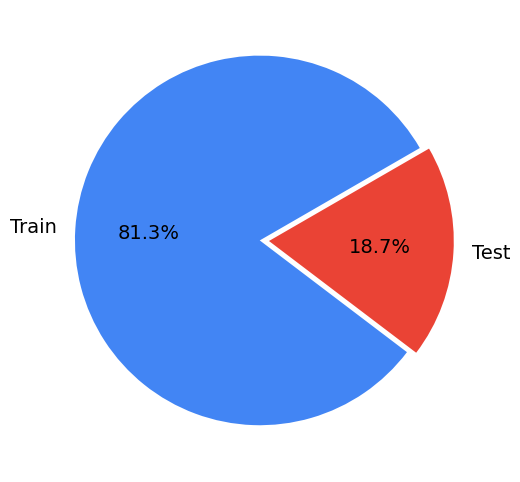

In [156]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels)],
        labels=['Train','Test'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0),
        startangle=30);

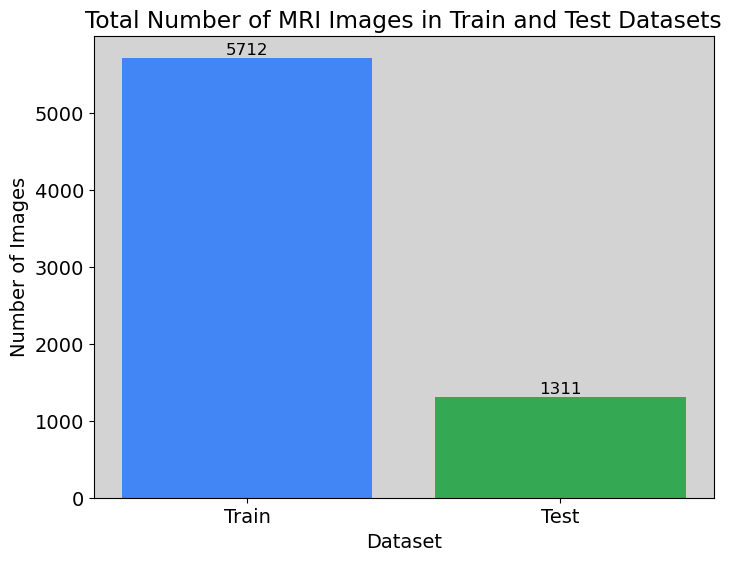

In [160]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
train_count = len(train_labels)  # Replace with the actual count for the train dataset
test_count = len(test_labels)  # Replace with the actual count for the test dataset

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Train', 'Test'], [train_count, test_count], color=['#4285f4', '#34a853'])
plt.xlabel('Dataset')
plt.ylabel('Number of Images')
plt.title('Total Number of MRI Images in Train and Test Datasets')

# Add labels on top of the bars
for i, count in enumerate([train_count, test_count]):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

plt.show()


In [286]:
#data augmentation
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

In [4]:
#dummy
import cv2
import imutils
import numpy as np


img_path = r'C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\dataset\Training\meningioma\Tr-me_0022.jpg' 
#"C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\dataset\Training\pituitary\Tr-pi_0030.jpg"
#"C:\Users\jms\OneDrive\Desktop\Major 1\CodeBrain\dataset\Training\notumor\Tr-no_0019.jpg"
img = cv2.imread(img_path)
img = cv2.resize(
            img,
            dsize=(224,224),
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray,5, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2GRAY)

#new_img = cv2.equalizeHist(new_img)
new_img = cv2.cvtColor(new_img,cv2.COLOR_GRAY2RGB)

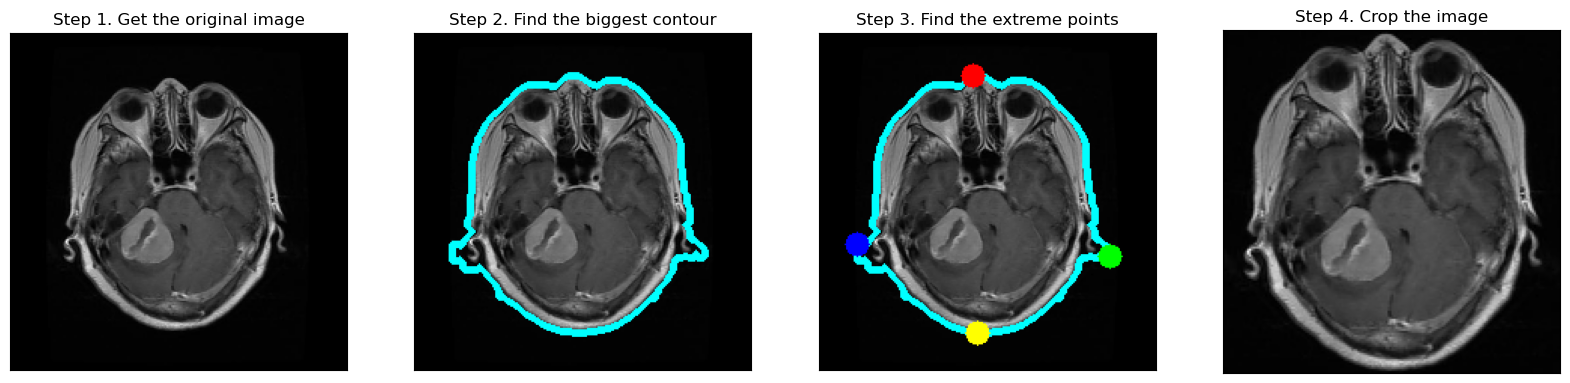

In [5]:
plt.figure(figsize=(20,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [145]:
# Function to display a list of images based on the given index
def show_images(paths, label_paths, index_list=range(10), im_size=250, figsize=(12, 8), save=False):
    """
    Show images from a given path based on the inputted
    list indices related to the desired images one wishes
    to see.
    """

    num_images = len(index_list)
    num_rows = (num_images + 3) // 4
    
    _, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=figsize)
    ax = ax.flatten()

    for i, index in enumerate(index_list):
        if i >= num_images:
            break
        
        image = load_img(paths[index], target_size=(im_size, im_size))
        ax[i].imshow(image)
        ax[i].set_title(f'{index}: {label_paths[index]}')
        ax[i].axis('off')

    plt.tight_layout()
    
    if save:
        plt.savefig('show_image.pdf')
    else:
        plt.show()


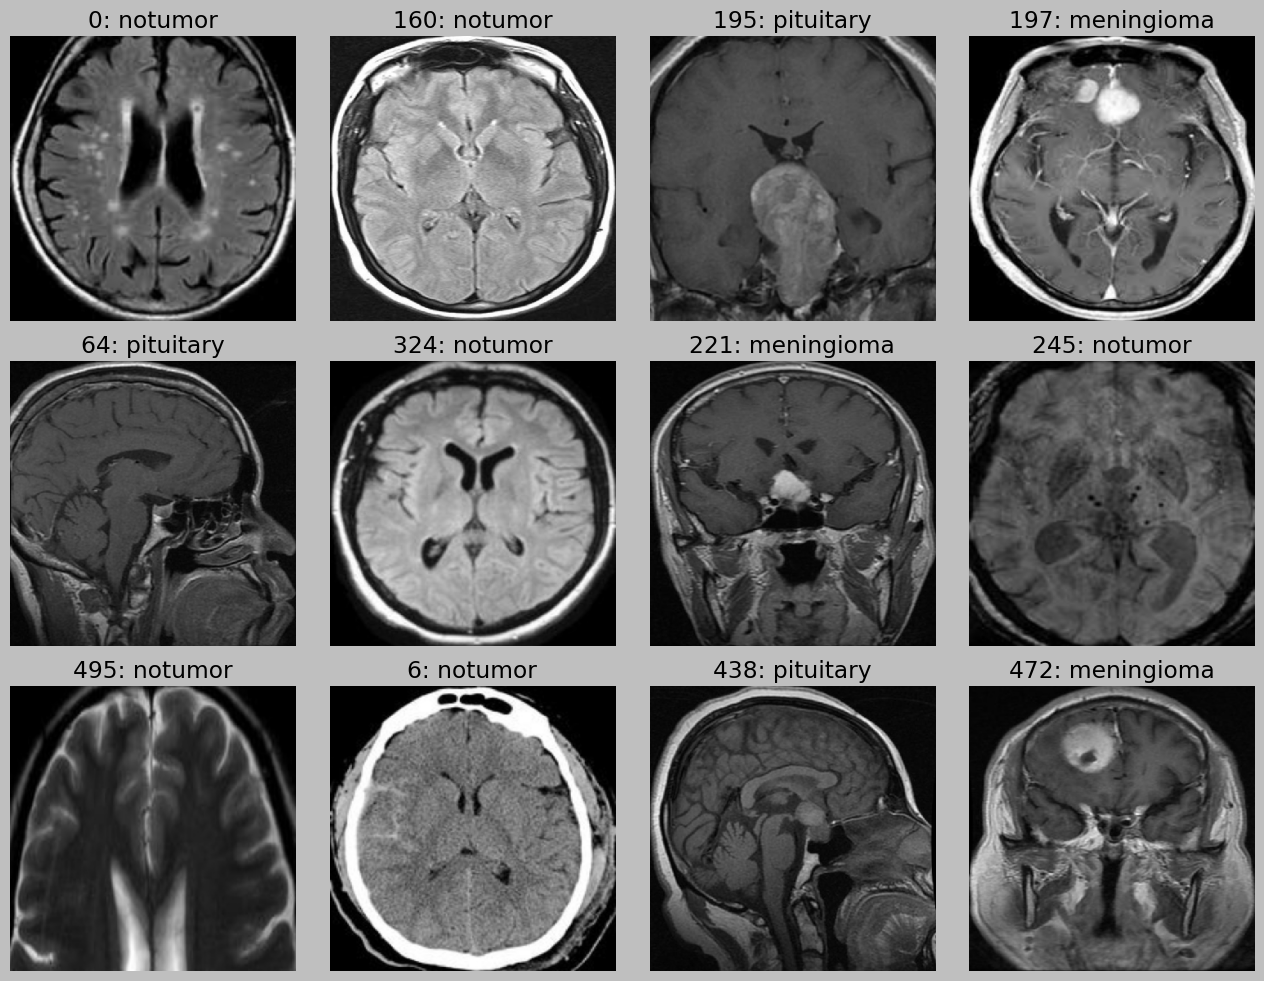

In [237]:
show_images(train_paths, 
            train_labels, 
            index_list=[0, 160, 195, 197,
                        64, 324, 221, 245,
                        495, 6, 438, 472], 
            im_size=350, 
            figsize=(13,10))

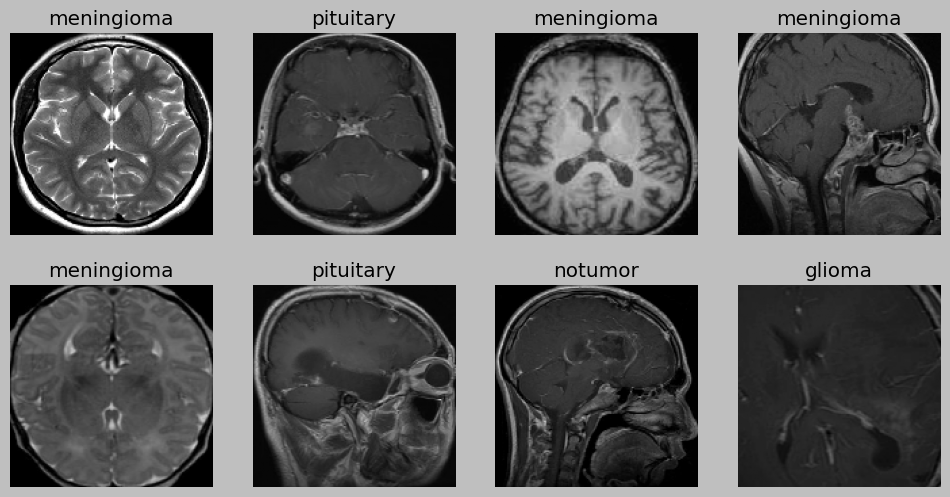

In [330]:
IMAGE_SIZE = 150
def open_images(paths):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))
        image = augment_image(image)
        images.append(image)
    return np.array(images)

images = open_images(test_paths[1:10])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [13]:
#data generatpr